In [118]:
### Definition of the Business need in this Project:

# A VP of a Grocery Retail Store wanted to know how they could maximize the profit of Cereals. 
# He reached out to the Category Manager of Cereals and she asked her if she may know how to proceed.
# During their discussion, they understood they could work on Promotions and maximize the sales volume.
# Then, they emailed the Pricing Director to share their business need.
# The Pricing Director ensured them he could work on promotions even if he did not have any idea about how the trends of sales volume would be.

# All three executives felt a little bit overwhelmed because they did not know the factors that drive the sales of cereals( lack of relevant data)
# The Category Manager thought the Price could be the main factor, 
# However, the Pricing Director was surprised to see that for the Cereals whose Promotions were frequent, the Profit was not as high as expected.
# They looked at the Profit of all Cereals (in Tableau Dashboards Report) and they realized that even Cereals in less known brands can have higher profits than popular Cereals 

# Both the Category Manager and the VP reached out to the Data Scientist with the expectation of getting further ideas on how to proceed
# The Data Scientist suggests another alternative to get more insights about the cereal products
# She asked the VP and the CM if they would be interested in grouping Cereals that provide similar features at a high level.
# By assuming that Customers buy what they know, it was a good point for them to know how to manage the Cereals based on their nutrients.


# Assuming that the Grocery Store has a database that provides the values of each component of the Breakfast Cereals.
# This database was built with a team of Data Engineers and Business Systems analysts while handling the data from Vendor Catalogs. 


# The Data Scientist ensured the VP and the Category Manager that it is possible to group all Breakfast Cereals that provide similar features at a high level.
# She will ONLY need to collaborate with the Data Team and gather relevant data. 
# However, he asked if they had any idea of which nutrients could be in the Breakfast Cereals.
# Their response was: "We know some but we are not sure. So, it could be good if we can see the data with all the nutrients for each Cereal Breakfast Item."

# That sounds perfect with the Data Scientist, 
# She, therefore, suggests to them that she is going to collect data and show them the nutrients that are in each Cereal Item regardless of Category and Brand
# The VP and the CM agreed.

# After a couple of days, the relevant data was retrieved from the database.

In [119]:
### Purpose of the Data Scientist for the Project:

# The Data Scientist gets datasets named “Cereals” with different variables ( Categorical & numerical) with all the nutrients of the breakfast cereals. 
# The level of content for the nutrients(which are also called variables) differ.
# The VP and CM prefer to focus on the Cereals with the 10 measurements 
# which are: calories', 'protein', 'fat', 'potass', 'sodium', 'fiber', 'carbo', 'sugars', 'vitamins', 'weight'

# As a Data Scientist, I will have to use the data and determine the clusters, 
# Then determine the closeness of the variables in each cluster, 
# and next identify the average of the variables in each cluster to be able to help make decisions on the purpose of how to group similar cereals.

In [120]:
### General Business Purpose for the Data Scientist: 

# Explore and create the clusters on the data based on 10 measurements of Cereals.

In [121]:
import pandas as pd

In [122]:
### Step 1: Read the datasets

df = pd.read_csv("Cereals.csv")
print(df)

                         name mfr type  calories  protein  fat  sodium  fiber  \
0                   100%_Bran   N    C        70        4    1     130   10.0   
1           100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4              Almond_Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat_Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties_Honey_Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  

In [123]:
# 1.1. How many Cereals Names do we have
# Assuming your dataset is loaded as 'df'
distinct_cereal_count = df['name'].nunique()

print(f"Distinct count of cereal names: {distinct_cereal_count}")

unique_cereal_names = df['name'].unique()
print(unique_cereal_names)


Distinct count of cereal names: 77
['100%_Bran' '100%_Natural_Bran' 'All-Bran' 'All-Bran_with_Extra_Fiber'
 'Almond_Delight' 'Apple_Cinnamon_Cheerios' 'Apple_Jacks' 'Basic_4'
 'Bran_Chex' 'Bran_Flakes' "Cap'n'Crunch" 'Cheerios'
 'Cinnamon_Toast_Crunch' 'Clusters' 'Cocoa_Puffs' 'Corn_Chex'
 'Corn_Flakes' 'Corn_Pops' 'Count_Chocula' "Cracklin'_Oat_Bran"
 'Cream_of_Wheat_(Quick)' 'Crispix' 'Crispy_Wheat_&_Raisins' 'Double_Chex'
 'Froot_Loops' 'Frosted_Flakes' 'Frosted_Mini-Wheats'
 'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats' 'Fruitful_Bran' 'Fruity_Pebbles'
 'Golden_Crisp' 'Golden_Grahams' 'Grape_Nuts_Flakes' 'Grape-Nuts'
 'Great_Grains_Pecan' 'Honey_Graham_Ohs' 'Honey_Nut_Cheerios' 'Honey-comb'
 'Just_Right_Crunchy__Nuggets' 'Just_Right_Fruit_&_Nut' 'Kix' 'Life'
 'Lucky_Charms' 'Maypo' 'Muesli_Raisins,_Dates,_&_Almonds'
 'Muesli_Raisins,_Peaches,_&_Pecans' 'Mueslix_Crispy_Blend'
 'Multi-Grain_Cheerios' 'Nut&Honey_Crunch' 'Nutri-Grain_Almond-Raisin'
 'Nutri-grain_Wheat' 'Oatmeal_Raisin_Crisp

In [124]:
### Step 2: Explore Data

# 2.1. Determine the variables and the data type of the variables
df.info()
print(df.columns)

# 2.2. Check if there are missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB
Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf

In [125]:
# 2.3. Statistical Summary
print(df.describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  76.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.802632   
std     19.484119   1.094790   1.006473   83.832295   2.383364   3.907326   
min     50.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.500000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  76.000000   75.000000   77.000000  77.000000  77.000000  77.000000   
mean    7.026316   98.666667   28.246753   2.207792   1.029610   0.821039   
std     4.378656   70.410636   22.342523   0.832524   0.150477   0.232716  

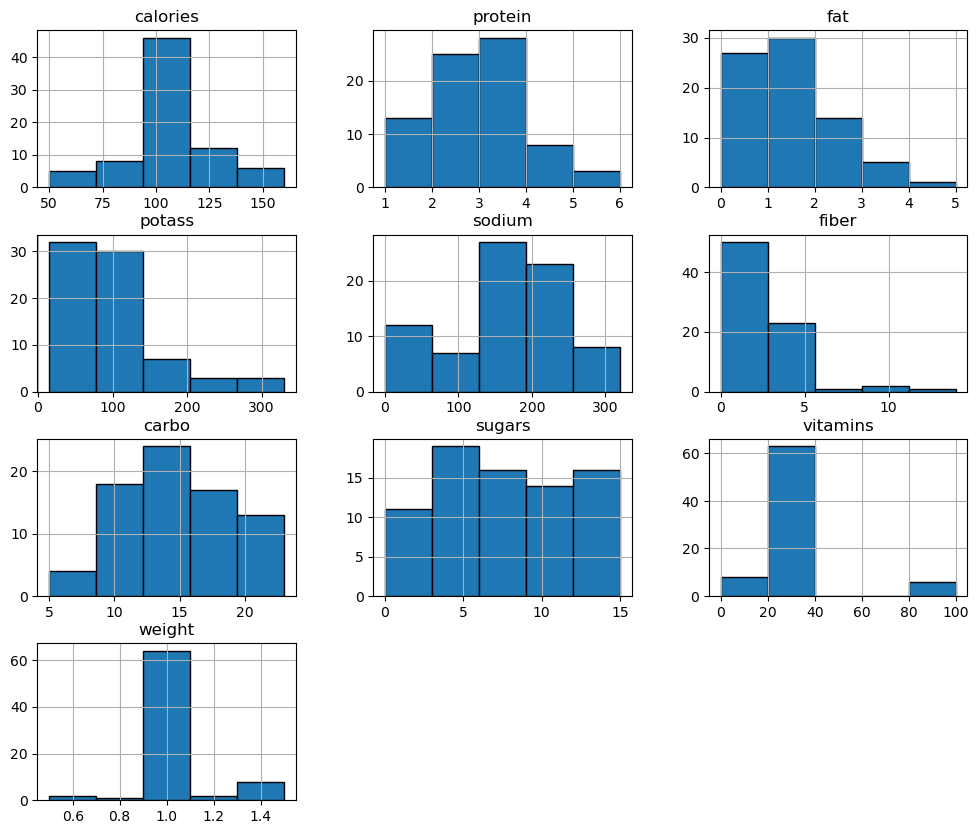

In [126]:
# 2.3: Data Visualization for EDA
# Plotting Histograms to visualize the distribution of the specific variables

import seaborn as sns
import matplotlib.pyplot as plt

df[['calories', 'protein', 'fat', 'potass', 'sodium', 'fiber', 'carbo', 'sugars', 'vitamins', 'weight']].hist(bins=5, edgecolor='black', figsize=(12,10))
plt.show()

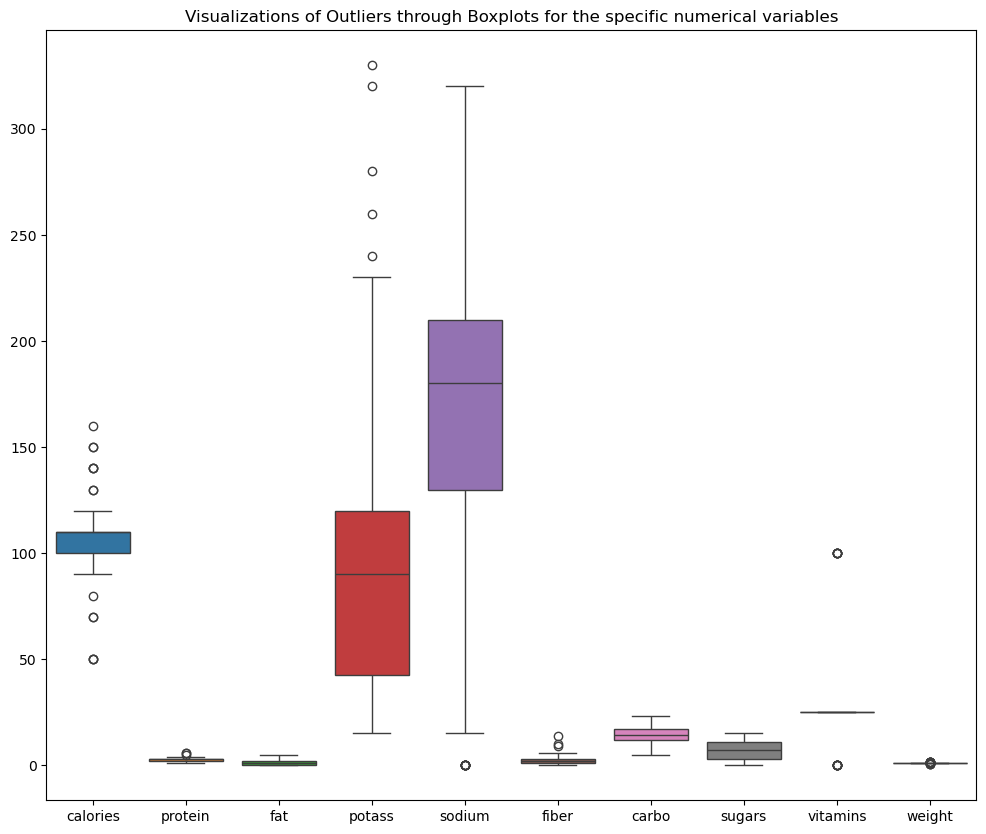

In [127]:
# Ploting outliers using Boxplot
plt.figure(figsize=(12,10))
sns.boxplot(data=df[['calories', 'protein', 'fat', 'potass', 'sodium', 'fiber', 'carbo', 'sugars', 'vitamins', 'weight']])
plt.title("Visualizations of Outliers through Boxplots for the specific numerical variables")
plt.show()

In [128]:
### Step 3: Data Processing 

# Note that Data partitioning is not necessary for clustering model because Clustering is unsupervised learning technique

# 3.1. Data processing

# Looking at the histogram, it is obvious that the numerical variables are not on the same scale,
# To allow the machine learning algorithm to work correctly/ effectively, I will need to normalize the numerical variables(=Rescale the datasets).
# As Rescaling can be done either by using the Min-Max method or the Standardization method, I will choose Standardization because the datasets have outliers.

from sklearn.preprocessing import StandardScaler
num_cols = ['calories', 'protein', 'fat', 'potass', 'sodium', 'fiber', 'carbo', 'sugars', 'vitamins', 'weight']

scaler = StandardScaler()

df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df[num_cols])

print(df_standardized[num_cols])

    calories   protein       fat    potass    sodium     fiber     carbo  \
0  -1.905397  1.337319 -0.012988  2.592711 -0.356306  3.314439 -2.525453   
1   0.677623  0.417912  3.987349  0.519495 -1.737087 -0.064172 -1.752563   
2  -1.905397  1.337319 -0.012988  3.164633  1.204578  2.892113 -2.010193   
3  -2.938605  1.337319 -1.013072  3.307613 -0.236238  5.003745 -1.752563   
4   0.161019 -0.501495  0.987096       NaN  0.484170 -0.486498 -0.206782   
..       ...       ...       ...       ...       ...       ...       ...   
72  0.161019 -0.501495 -0.012988 -0.552858  1.084510 -0.908824  1.596629   
73  0.161019 -1.420902 -0.012988 -1.053289 -0.236238 -0.908824 -0.464412   
74 -0.355585  0.417912 -0.012988  0.233535  0.844374  0.358155  0.566108   
75 -0.355585  0.417912 -0.012988  0.162044  0.484170  0.358155  0.566108   
76  0.161019 -0.501495 -0.012988 -0.552858  0.484170 -0.486498  0.308478   

      sugars  vitamins    weight  
0  -0.235948  -0.14627 -0.198067  
1   0.223848  -1.

In [129]:
# Checking if there are missing values after standardization
print(df_standardized[num_cols].isnull().sum())

calories    0
protein     0
fat         0
potass      2
sodium      0
fiber       0
carbo       1
sugars      1
vitamins    0
weight      0
dtype: int64


In [130]:
# Simplify the Standardized datasets name in a simple datasets such as "df1"
df1 = df_standardized[num_cols]
print(df1.columns)

Index(['calories', 'protein', 'fat', 'potass', 'sodium', 'fiber', 'carbo',
       'sugars', 'vitamins', 'weight'],
      dtype='object')


In [131]:
# Replace the missing values with means in the df1 datasets
df1.fillna(df1.mean(), inplace=True)

C:\Users\claud\AppData\Local\Temp\ipykernel_37956\3437316025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(df1.mean(), inplace=True)


In [132]:
# Check if we still have missing values noted as Nas in the "df1" datasets
print(df1.isnull().sum())

calories    0
protein     0
fat         0
potass      0
sodium      0
fiber       0
carbo       0
sugars      0
vitamins    0
weight      0
dtype: int64


In [133]:
### Step 4: Data Modeling

# 4.1. Cluster Model on Training datasets

# I build the Clustering model using a K-means clustering algorithm on Standardized/ Rescaled datasets which is "df1"
# the standard K-means equal to 3

from sklearn.cluster import KMeans

# Defining the number of Clusters
cereals_clusters_Model = KMeans(n_clusters=3, random_state=42)

# Fitting the Clustering model on the standardized datasets or scaled datasets "df1"
cereals_clusters_Model.fit(df1)

C:\Users\claud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [134]:
# 4.2. Prediction on Scaled datasets "df1"
cereals_clusters = cereals_clusters_Model.predict(df1)

print("Clusters assigned to Cereals Datasets:",cereals_clusters)

Clusters assigned to Cereals Datasets: [0 2 0 0 2 2 2 0 1 1 2 1 2 2 2 1 1 2 2 2 1 1 2 1 2 2 1 0 0 2 2 2 1 1 2 2 2
 2 1 0 1 2 2 1 2 2 0 1 2 0 1 2 0 1 1 1 1 1 0 2 1 1 1 1 1 1 2 1 1 1 0 1 1 2
 1 1 2]


In [135]:
# Another way is to define the number of clusters and access the center of the clusters
# First, I will need to define the numeric columns 
numeric_cols = df1.select_dtypes(include=['number']).columns

#Build the model using KMeans Algorithm
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the model to the standardized datasets
kmeans.fit(df1)

cereals_cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numeric_cols)

C:\Users\claud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [136]:
# 4.3. See the center of each cluster

import pandas as pd
cereals_cluster_centers= pd.DataFrame(kmeans.cluster_centers_,columns=numeric_cols)
cereals_cluster_centers.index = [f'Cluster {i+1}' for i in range(len(cereals_cluster_centers))]

print(cereals_cluster_centers)

           calories   protein       fat    potass    sodium     fiber  \
Cluster 1  0.419321  0.647764  0.153693  1.609721  0.364102  1.484358   
Cluster 2 -0.477138  0.174540 -0.542445 -0.244328 -0.080856 -0.142426   
Cluster 3  0.360995 -0.442178  0.535445 -0.355145 -0.052263 -0.418381   

              carbo    sugars  vitamins    weight  
Cluster 1 -0.335597  0.492063  0.416870  1.585698  
Cluster 2  0.663118 -0.871371  0.019359 -0.428252  
Cluster 3 -0.597382  0.765221 -0.182602 -0.144123  


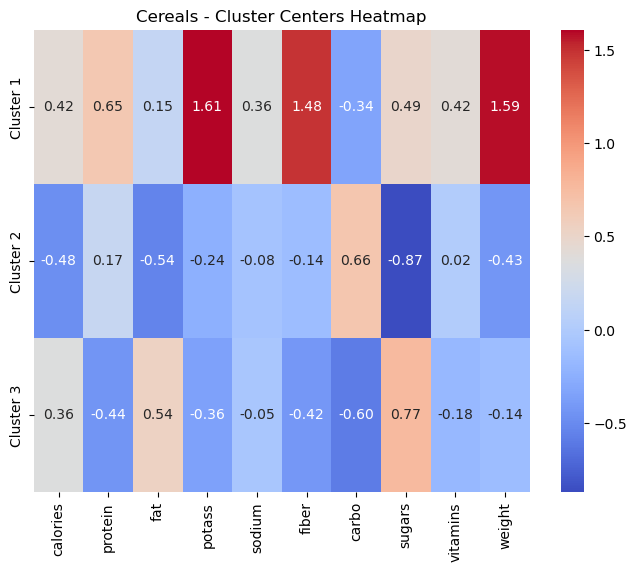

In [137]:
# 4.4. Visualize the clusters to highlight each component of the cluster

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cereals_cluster_centers, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cereals - Cluster Centers Heatmap")
plt.show()

In [138]:
# 4.5. Interpretation of the Clusters

# Cluster 1: 
# Group of Breakfast Cereals based on High levels of Potassium, Fiber, and Weight. 
# Protein, Sugars, and Vitamins are also at a middle level 
# While Sodium, Fat, Calories, and Carbo are at a low level.

# Cluster 2:
# Group of Breakfast Cereals based on High levels of Carbo, Proteins, and Vitamins
# Sodium, Fiber, and Potassium are at a middle level.
# Weight, Calories, Fat, and Sugar are at a low level.

# Cluster 3:
# Group of Breakfast Cereals based on High Levels of Sugars, Fat, and Calories.
# Sodium, Weight, and Vitamins are at a middle level.
# Potassium, Fiber, Protein, and Carbo are at a low level.


In [139]:
### Step 5: Evaluation of the Clustering Model Performance

# 5.1: The evaluation is done with the silhouette
# Silhouette score allows us to determine the quality of the clusters; it is simply important if the clustering result is perfect

# Silhouette score close to 1 says that the clustering result is perfect: clusters are well separated and distinct
# Silhouette score around 0 means that the clusters are overlapped ( clustering is not well defined)
# Silhouette score less than 0 or negative means that the clusters may contain wrong data points or data points are in the wrong clusters.

In [140]:
# 5.2: Determine the silhouette for the clusters

from sklearn.metrics import silhouette_score, silhouette_samples

# Calculate the Silhouette Score
sil_score = silhouette_score(df1, cereals_clusters)
print(f"Cereal Silhouette Score: {sil_score:.2f}")

Cereal Silhouette Score: 0.20


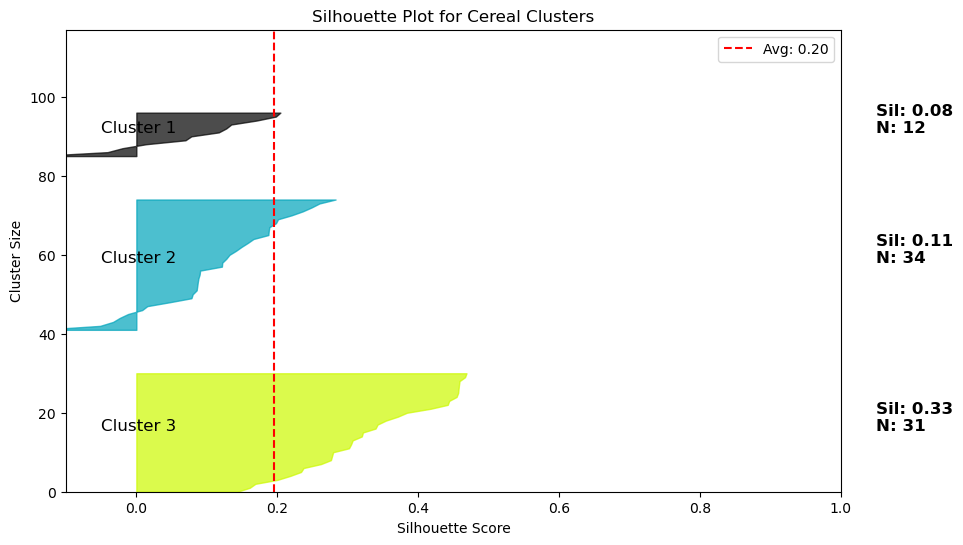

In [141]:
# 5.3: Plotting the Silhouette score and the number of samples for each Cluster

# This plot is necessary because it can help decision-makers to know the best cluster to use for specific business needs.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(df1, cereals_clusters)

# Determine the Number of clusters
n_clusters = len(set(cereals_clusters))

# Calculate the average silhouette score( equal to the one previously found) and sample count per cluster
cluster_silhouette_means = {}
cluster_sizes = {}

for i in range(n_clusters):
    cluster_silhouette_means[i] = silhouette_vals[cereals_clusters == i].mean()
    cluster_sizes[i] = (silhouette_vals[cereals_clusters == i].shape[0])  # This gives us the number of samples which is "N"

# Sort clusters by average silhouette score.
# This could be optional because I want the plot to look nice.
sorted_clusters = sorted(cluster_silhouette_means.keys(), key=lambda k: -cluster_silhouette_means[k])

# Initialize the figure to make a nice readable plot
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 0  # This helps to track the y-axis position
for i in sorted_clusters:
    # Get the silhouette scores for the current cluster( or each cluster)
    cluster_silhouette_vals = silhouette_vals[cereals_clusters == i]

    # Sort values of the silhouette scores for better visualization
    cluster_silhouette_vals.sort()

    size_cluster_i = cluster_sizes[i]  # Number of samples in cluster
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)  # Assign a color to the cluster
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_silhouette_vals,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    # Add cluster label inside the section
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {i+1}", fontsize=12)

    # Add silhouette score and sample size (n) on the right side
    ax.text(1.05, y_lower + 0.5 * size_cluster_i,  
            f"Sil: {cluster_silhouette_means[i]:.2f}\nN: {cluster_sizes[i]}", 
            fontsize=12, color="black", fontweight='bold')

    # Update y_lower for the next cluster
    y_lower = y_upper + 10  # Add space between clusters

# I can draw a vertical line to show the overall average silhouette score
sil_score = silhouette_score(df1, cereals_clusters)
ax.axvline(x=sil_score, color="red", linestyle="--", label=f"Avg: {sil_score:.2f}")

# Formatting the plot
ax.set_xlabel("Silhouette Score")
ax.set_ylabel("Cluster Size")
ax.set_title("Silhouette Plot for Cereal Clusters")
ax.set_xlim([-0.1, 1])  # Silhouette scores range from -1 to 1
ax.set_ylim([0, len(df1) + (n_clusters + 1) * 10])
ax.legend()

# Show the plot
plt.show()

In [142]:
# 5.4. Interpretation of the Silhouette Results for each Cluster: 

# Cluster 1(Group Based on High Level of Potassium) has a silhouette score equal to 0.08 and a sample of 12 Cereals Items
# That means the cereal names in this group are not distinct from the ones in other groups. They are more closer to other groups

# Cluster 2(Group Based on High Level of Carbo has a silhouette score equal to 0.11 and a sample of 34 Cereal Items.
# That means the cereals are closer to other groups as the silhouette score is not high.

# Cluster 3(Group based on High level of Sugar has a silhouette score equal to 0.33 with a sample of 31 Cereal Items.
# That means the cereals are closer to other groups as the silhouette score is not high.

### Based on the silhouette score which is lower than 0.5, I would conclude that the model could be more performed 
# if ONLY the purpose is to create well-defined clusters/ groups.
# Use a different (low or high) k means.
# Or use another algorithm of Clustering. 

In [143]:
### Step 6: Provide the list of Breakfast Cereal Names to the VP and the CM

# Determine the names of Cereals in each Cluster

# Start by assigning clusters to the Datasets

# I need to use the object in the prediction algorithm
# cereals_clusters are

df["Cluster"] = cereals_clusters + 1
print(df["Cluster"])

0     1
1     3
2     1
3     1
4     3
     ..
72    2
73    3
74    2
75    2
76    3
Name: Cluster, Length: 77, dtype: int32


In [144]:
# Provide the final list of Cereal Names in each Cluster

for cluster_id in sorted(df["Cluster"].unique()):  
    cereals = df[df["Cluster"] == cluster_id]["name"].tolist()
    print(f"Cluster {cluster_id}: {cereals}\n")

Cluster 1: ['100%_Bran', 'All-Bran', 'All-Bran_with_Extra_Fiber', 'Basic_4', 'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats', 'Fruitful_Bran', 'Just_Right_Fruit_&_Nut', 'Mueslix_Crispy_Blend', 'Nutri-Grain_Almond-Raisin', 'Post_Nat._Raisin_Bran', 'Raisin_Bran', 'Total_Raisin_Bran']

Cluster 2: ['Bran_Chex', 'Bran_Flakes', 'Cheerios', 'Corn_Chex', 'Corn_Flakes', 'Cream_of_Wheat_(Quick)', 'Crispix', 'Double_Chex', 'Frosted_Mini-Wheats', 'Grape_Nuts_Flakes', 'Grape-Nuts', 'Just_Right_Crunchy__Nuggets', 'Kix', 'Maypo', 'Multi-Grain_Cheerios', 'Nutri-grain_Wheat', 'Product_19', 'Puffed_Rice', 'Puffed_Wheat', 'Quaker_Oat_Squares', 'Quaker_Oatmeal', 'Raisin_Squares', 'Rice_Chex', 'Rice_Krispies', 'Shredded_Wheat', "Shredded_Wheat_'n'Bran", 'Shredded_Wheat_spoon_size', 'Special_K', 'Strawberry_Fruit_Wheats', 'Total_Corn_Flakes', 'Total_Whole_Grain', 'Triples', 'Wheat_Chex', 'Wheaties']

Cluster 3: ['100%_Natural_Bran', 'Almond_Delight', 'Apple_Cinnamon_Cheerios', 'Apple_Jacks', "Cap'n'Crunch", 'Cinna